In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv')

In [3]:
data

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000
...,...,...,...,...,...,...,...,...,...,...
111433,Reimports,2021,11/12/2021,Saturday,All,All,All,$,0,165000000
111434,Reimports,2021,12/12/2021,Sunday,All,All,All,$,0,165000000
111435,Reimports,2021,13/12/2021,Monday,All,All,All,$,2000000,166000000
111436,Reimports,2021,14/12/2021,Tuesday,All,All,All,$,1000000,167000000


In [4]:
data.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


In [5]:
data.tail()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
111433,Reimports,2021,11/12/2021,Saturday,All,All,All,$,0,165000000
111434,Reimports,2021,12/12/2021,Sunday,All,All,All,$,0,165000000
111435,Reimports,2021,13/12/2021,Monday,All,All,All,$,2000000,166000000
111436,Reimports,2021,14/12/2021,Tuesday,All,All,All,$,1000000,167000000
111437,Reimports,2021,15/12/2021,Wednesday,All,All,All,$,1000000,168000000


In [6]:
data.shape

(111438, 10)

In [7]:
data.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Country', 'Commodity',
       'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111438 entries, 0 to 111437
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Direction       111438 non-null  object
 1   Year            111438 non-null  int64 
 2   Date            111438 non-null  object
 3   Weekday         111438 non-null  object
 4   Country         111438 non-null  object
 5   Commodity       111438 non-null  object
 6   Transport_Mode  111438 non-null  object
 7   Measure         111438 non-null  object
 8   Value           111438 non-null  int64 
 9   Cumulative      111438 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 8.5+ MB


In [9]:
data.describe()

,Year,Value,Cumulative
count,111438.000000,1.114380e+05,1.114380e+05
mean,2017.982430,2.905750e+07,5.174254e+09
std,1.992352,5.267248e+07,9.765606e+09
min,2015.000000,0.000000e+00,0.000000e+00
25%,2016.000000,1.000000e+06,1.140000e+08
50%,2018.000000,8.000000e+06,1.420000e+09
75%,2020.000000,2.800000e+07,4.797000e+09
max,2021.000000,5.490000e+08,6.718000e+10


In [10]:
data.isnull().sum()

Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

In [11]:
data.Direction.value_counts()

Exports      80973
Imports      27940
Reimports     2525
Name: Direction, dtype: int64

In [12]:
data.Year.value_counts()

2020    16031
2016    16028
2018    16019
2019    16017
2015    16005
2017    15995
2021    15343
Name: Year, dtype: int64

In [13]:
data.Country.value_counts()

All                            50801
China                          27736
East Asia (excluding China)     7617
United States                   7499
Australia                       5082
United Kingdom                  5080
Japan                           2541
European Union (27)             2541
Total (excluding China)         2541
Name: Country, dtype: int64

In [14]:
data.Commodity.value_counts()

All                                45720
Milk powder, butter, and cheese    15132
Meat and edible offal              15100
Logs, wood, and wood articles      10108
Fish, crustaceans, and molluscs     7600
Non-food manufactured goods         5082
Electrical machinery and equip      5079
Mechanical machinery and equip      5076
Fruit                               2541
Name: Commodity, dtype: int64

In [15]:
data.Measure.value_counts()

$         88727
Tonnes    22711
Name: Measure, dtype: int64

In [16]:
exports_by_country = data[data.Country!="All"].groupby('Country').sum()
exports_by_country.drop(['Year', 'Cumulative'], axis = 1, inplace = True)
exports_by_country.sort_values(by=['Value']).head(10)

,Value
Country,
United Kingdom,21591000000
Japan,23155000000
European Union (27),26644000000
United States,52321338000
Australia,107686000000
East Asia (excluding China),116562137000
China,282769573000
Total (excluding China),291991000000


<AxesSubplot:ylabel='Country'>

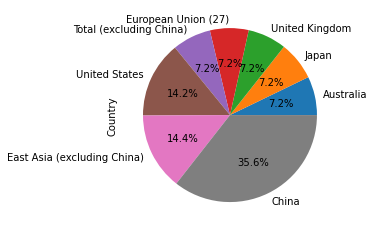

In [17]:
data[(data['Country']!='All') & (data['Direction']=='Exports') & (data['Measure']=='$')].Country.value_counts().sort_values().plot(kind = 'pie', autopct='%1.1f%%')

In [18]:
china_exports_usd = data[(data['Country']=='China') & (data['Direction']=='Exports') & (data['Measure']=='$')]

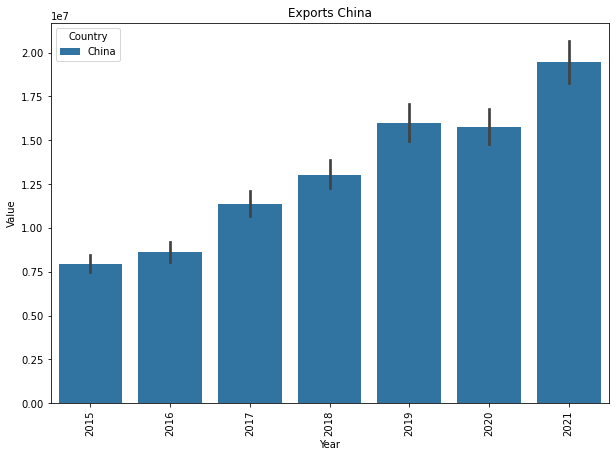

In [19]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Country',
            data = china_exports_usd)
plt.xticks(rotation = 90)
plt.title('Exports China')
plt.show()

In [20]:
usa_exports_usd = data[(data['Country']=='United States')  & (data['Direction']=='Exports') & (data['Measure']=='$')]

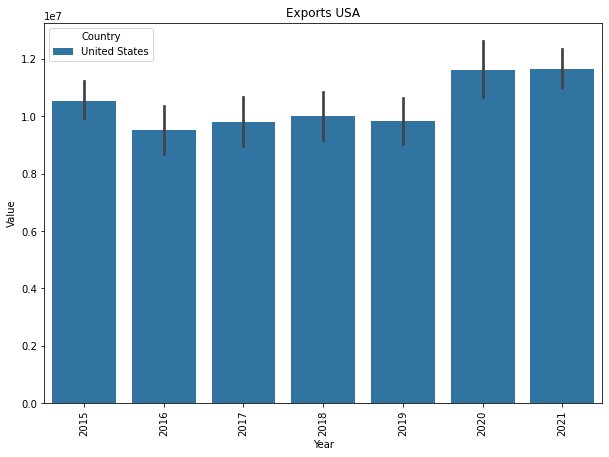

In [21]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Country',
            data = usa_exports_usd)
plt.xticks(rotation = 90)
plt.title('Exports USA')
plt.show()

In [22]:
comparison_china_vs_usa_exports_usd = data[(data['Country']=='China') | (data['Country']=='United States')  & (data['Direction']=='Exports') & (data['Measure']=='$')]

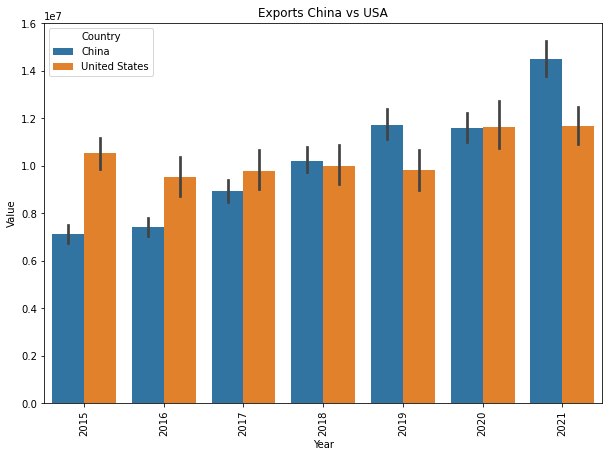

In [23]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Country',
            data = comparison_china_vs_usa_exports_usd)
plt.xticks(rotation = 90)
plt.title('Exports China vs USA')
plt.show()

In [24]:
data[data['Measure']=='$'].Commodity.value_counts()

All                                45720
Milk powder, butter, and cheese     7566
Meat and edible offal               7550
Non-food manufactured goods         5082
Electrical machinery and equip      5079
Mechanical machinery and equip      5076
Fish, crustaceans, and molluscs     5059
Logs, wood, and wood articles       5054
Fruit                               2541
Name: Commodity, dtype: int64

<AxesSubplot:ylabel='Commodity'>

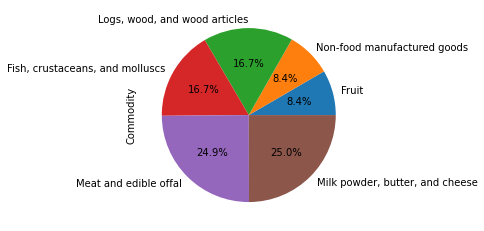

In [25]:
data[(data['Measure']=='$') & (data['Commodity']!='All') & (data['Direction']=='Exports')].Commodity.value_counts().sort_values().plot(kind = 'pie', autopct='%1.1f%%')

In [26]:
commodity_china_exports_usd = data[(data['Country']=='China')  & (data['Direction']=='Exports') & (data['Commodity']!='All')]

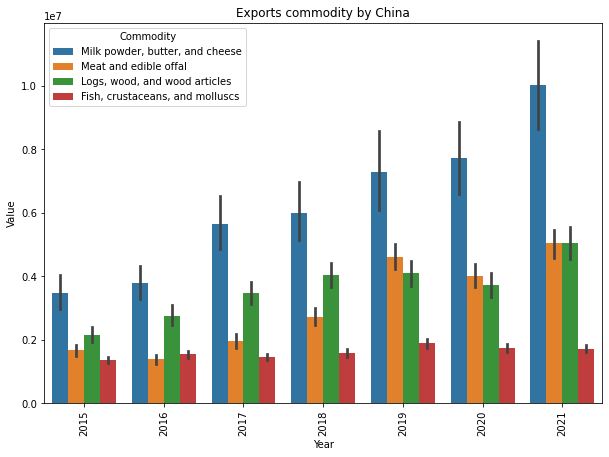

In [27]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Commodity',
            data = commodity_china_exports_usd)
plt.xticks(rotation = 90)
plt.title('Exports commodity by China')
plt.show()

In [28]:
commodity_by_usa_exports_usd = data[(data['Country']=='United States')  & (data['Direction']=='Exports') & (data['Commodity']!='All')]

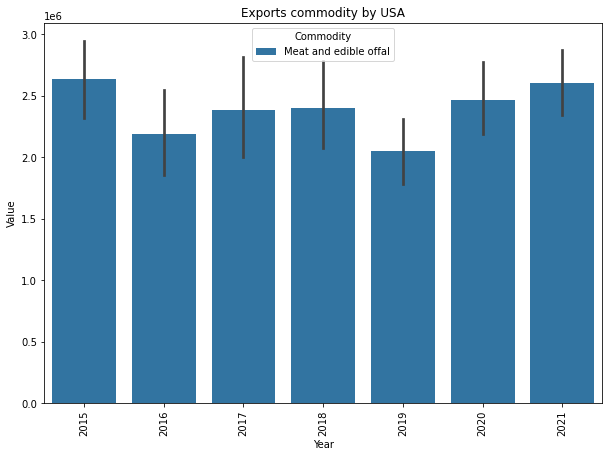

In [29]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Commodity',
            data = commodity_by_usa_exports_usd)
plt.xticks(rotation = 90)
plt.title('Exports commodity by USA')
plt.show()